In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

base_url = "https://www.1mg.com/categories/health-conditions/"
categories = ['diabetes-1', 'cardiac-care-35', 'stomach-care-30','liver-care-39','bone-joint-muscle-care-34','kidney-care-40','derma-care-1183','respiratory-care-14','eye-care-31']
medicine_data = []

for category in categories:
    page_num = 1
    total_medicines = 0
    print(f"Scraping category: {category}")

    while total_medicines < 100:
        url = f"{base_url}{category}?filter=true&page={page_num}"
        driver.get(url)

        time.sleep(20)  # Wait for the page to load

        soup = BeautifulSoup(driver.page_source, 'html.parser')

        for med in soup.find_all('div', class_='style__product-box___liepi'):
            try:
                name = med.find('div',class_='style__pro-title___2QwJy').text.strip()  
                price = med.find('div', class_='style__price-tag___cOxYc').text.strip()
                discount = med.find('span', class_='style__off-badge___2JaF-').text.strip() if med.find('span', class_='style__off-badge___2JaF-') else 'No discount'
                rating = med.find('div', class_='CardRatingDetail__ratings___1q8zc').text.strip() if med.find('div', class_='CardRatingDetail__ratings___1q8zc') else 'No rating'
                category = category

                medicine_data.append({
                    'Name': name,
                    'Price': price,
                    'Discount': discount,
                    'Rating': rating,
                    'Category': category
                })

                total_medicines += 1
            except:
                continue

        page_num += 1

driver.quit()

# Write to a CSV file or Excel
df = pd.DataFrame(medicine_data)
df.to_excel('medicines_data.xlsx', index=False)
print("Data loaded to medicines_data.xlsx")

In [2]:
df = pd.read_excel('medicines_data.xlsx') # Load the dataset

In [3]:
# Data Cleaning
# Remove currency symbols and convert 'Price' to float
df["Price"] = df["Price"].astype(str).str.replace("MRP", "").str.replace("₹", "").str.replace(",", "").astype(float)

# Clean 'Discount' column
df["Discount"] = df["Discount"].astype(str).str.replace("% off", "").replace("No discount", np.nan).astype(float)

# Clean 'Rating' column
df["Rating"] = df["Rating"].astype(str).str.extract(r"([\d\.]+)").astype(float)

In [4]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              Price    Discount        Rating
count   1055.000000  737.000000    646.000000
mean     446.066825   13.341927    329.009279
std      722.295814   10.464863   3291.974462
min       12.600000    1.000000      3.113000
25%      148.000000    6.000000      4.325025
50%      240.000000   11.000000      4.451450
75%      513.000000   18.000000      4.566675
max    17098.000000   58.000000  41707.000000


C:\Users\Chiranth\AppData\Local\Temp\ipykernel_24812\1631117068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="Price", data=df, ax=axes[0], palette="Blues")
C:\Users\Chiranth\AppData\Local\Temp\ipykernel_24812\1631117068.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
C:\Users\Chiranth\AppData\Local\Temp\ipykernel_24812\1631117068.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Category", y="Discount", data=df, ax=axes[1], palette="Greens", estimator=np.mean, ci=None)
C:\Users\Chiranth\AppData\Local\Temp\ipykernel_24812\1631117068.py:12: FutureWarning: 

Passing `palette` without assi

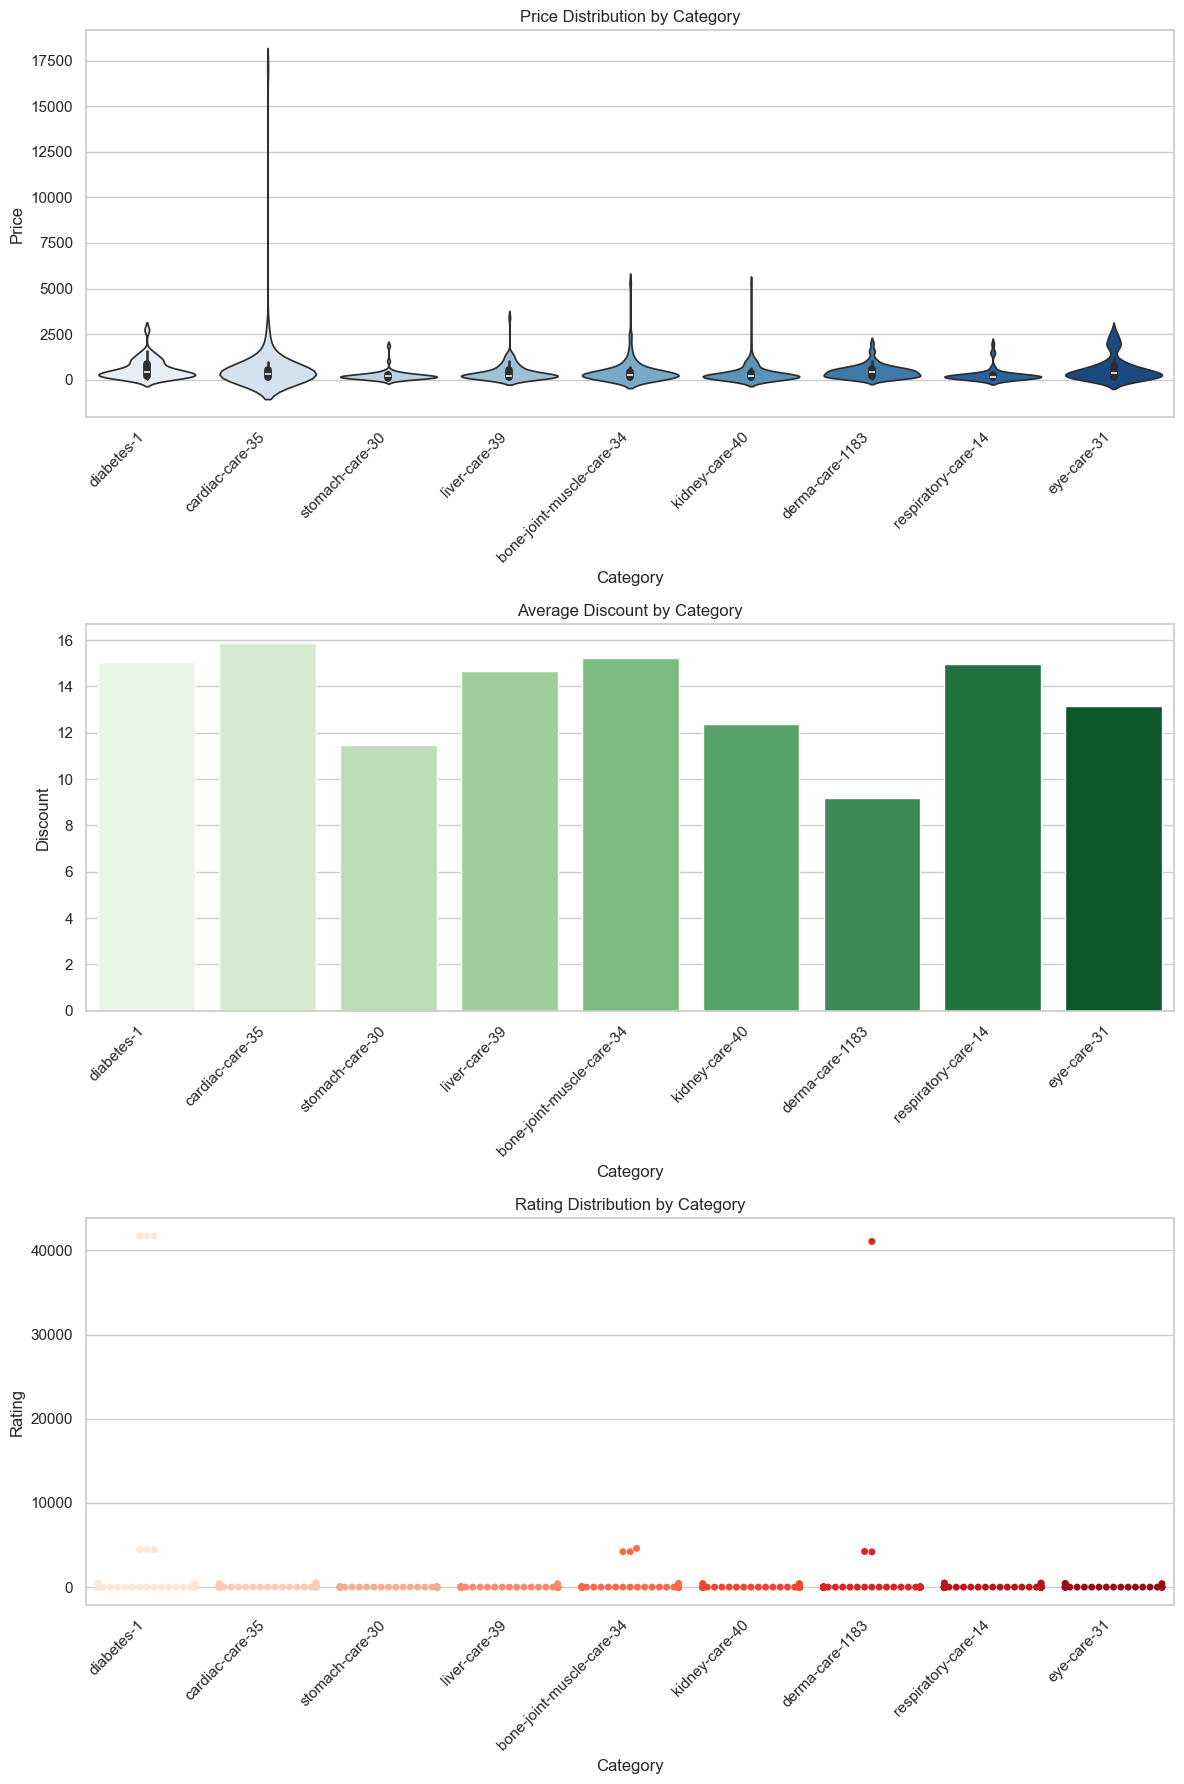

In [5]:
# Set style for plots
sns.set_theme(style="whitegrid")

# Create subplots for visualization
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
# Category-wise Price Distribution using Violin Plot
sns.violinplot(x="Category", y="Price", data=df, ax=axes[0], palette="Blues")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
axes[0].set_title("Price Distribution by Category")

# Category-wise Discount Distribution using Bar Plot
sns.barplot(x="Category", y="Discount", data=df, ax=axes[1], palette="Greens", estimator=np.mean, ci=None)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
axes[1].set_title("Average Discount by Category")

# Category-wise Rating Distribution using Swarm Plot
sns.swarmplot(x="Category", y="Rating", data=df, ax=axes[2], palette="Reds")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")
axes[2].set_title("Rating Distribution by Category")

# Adjust layout and show plots
plt.tight_layout()
plt.show()